In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tease.models.sequential import Sequential
from tease.layers.linear import Linear
from tease.activations.relu import Relu

In [2]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [3]:
df_train = pd.DataFrame(X_train, columns=housing.feature_names)
print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.6591      36.0  5.207739   1.099796      1556.0  3.169043     34.22   
1  7.6740      15.0  5.387879   0.942424       908.0  2.751515     33.86   
2  2.6803      52.0  4.278689   0.997951      1082.0  2.217213     37.76   
3  6.0358      32.0  5.475352   1.010563       779.0  2.742958     37.25   
4  5.7157      26.0  6.292632   1.008421      1596.0  3.360000     33.75   

   Longitude  
0    -118.40  
1    -118.38  
2    -122.42  
3    -121.93  
4    -118.02  


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [5]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11610, 1)

In [6]:
model = Sequential()
model.add(Linear(X_train.shape[1], 30))
model.add(Relu())
model.add(Linear(30, 10))
model.add(Relu())
model.add(Linear(10, 1))

In [7]:
history = model.train(X_train, y_train, 100, X_valid, y_valid)

epoch number 1

epoch number 2

epoch number 3

epoch number 4

epoch number 5

epoch number 6

epoch number 7

epoch number 8

epoch number 9

epoch number 10

epoch number 11

epoch number 12

epoch number 13

epoch number 14

epoch number 15

epoch number 16

epoch number 17

epoch number 18

epoch number 19

epoch number 20

epoch number 21

epoch number 22

epoch number 23

epoch number 24

epoch number 25

epoch number 26

epoch number 27

epoch number 28

epoch number 29

epoch number 30

epoch number 31

epoch number 32

epoch number 33

epoch number 34

epoch number 35

epoch number 36

epoch number 37

epoch number 38

epoch number 39

epoch number 40

epoch number 41

epoch number 42

epoch number 43

epoch number 44

epoch number 45

epoch number 46

epoch number 47

epoch number 48

epoch number 49

epoch number 50

epoch number 51

epoch number 52

epoch number 53

epoch number 54

epoch number 55

epoch number 56

epoch number 57

epoch number 58

epoch number 59

epoch 

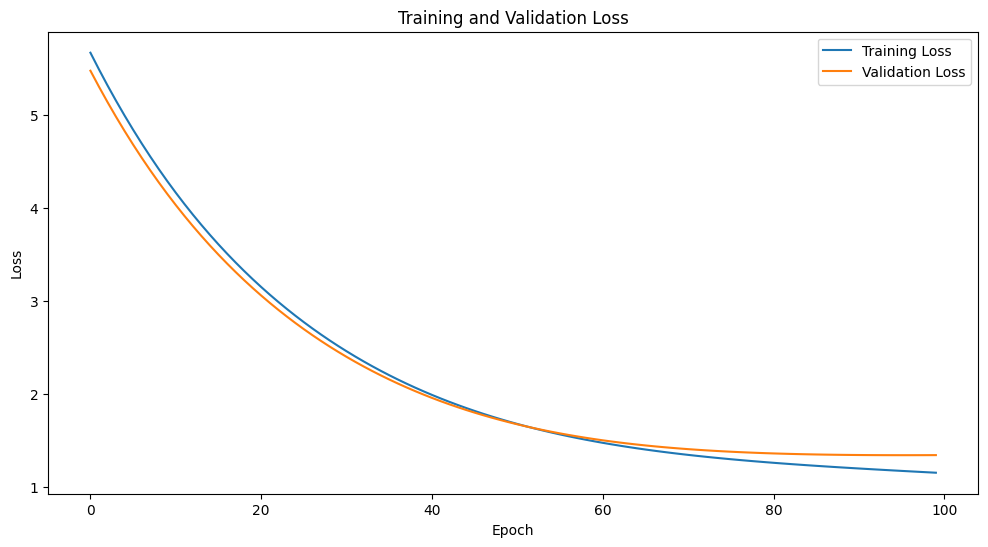

In [8]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
if 'val_loss' in history:
    plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()